# Challenge -- Regression Problem

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Importing the dataset

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,target
0,7.547600,0.151261,557.132466,354.008599,0.301029,55.282594,9635.211683,2.0,1.0,9461.469590
1,3.140491,0.794497,837.116189,104.515774,0.110622,88.516243,9425.041942,2.0,5.0,10257.271938
2,2.064447,0.236500,313.757354,259.127993,0.729964,88.350465,9115.661199,1.0,5.0,8719.214483
3,9.099262,0.453953,661.409826,466.070226,0.432750,21.516152,9584.310016,3.0,2.0,9165.197338
4,5.264564,0.683869,344.154511,485.441053,0.085599,90.308205,9193.271575,2.0,1.0,9458.427537


In [7]:
df.shape

(900, 10)

### There are 900 records and 10 features(9 features + 1 target feature)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       900 non-null    float64
 1   1       900 non-null    float64
 2   2       900 non-null    float64
 3   3       900 non-null    float64
 4   4       900 non-null    float64
 5   5       900 non-null    float64
 6   6       900 non-null    float64
 7   7       900 non-null    float64
 8   8       900 non-null    float64
 9   target  900 non-null    float64
dtypes: float64(10)
memory usage: 70.4 KB


In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,target
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,5.036548,0.504976,493.064463,297.303826,0.507925,49.781970,9507.426024,1.973333,3.436667,9118.263873
std,2.869018,0.289803,290.436017,116.899846,0.286008,28.684840,283.069448,0.788798,1.677367,852.633238
min,0.037452,0.000942,0.969406,100.651192,0.000527,0.185411,9000.096807,1.000000,1.000000,6298.862662
25%,2.518373,0.248575,247.145068,195.239150,0.284926,25.777689,9267.721916,1.000000,2.000000,8627.098283
50%,4.944200,0.524393,497.186526,301.949065,0.501211,49.517510,9500.814515,2.000000,3.000000,9208.588416
75%,7.631981,0.753136,736.572313,399.999965,0.750584,74.538269,9751.394987,3.000000,5.000000,9713.801784
max,9.997094,0.998795,999.208515,499.174221,0.999742,99.926403,9999.499080,3.000000,6.000000,11175.834533


### Categorical features : 7 & 8
### Numerical features : 0, 1, 2, 3, 4, 5 & 6

In [6]:
df.isnull().sum()

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
target    0
dtype: int64

### There are no null values present in the dataset.

# Checking Outliers

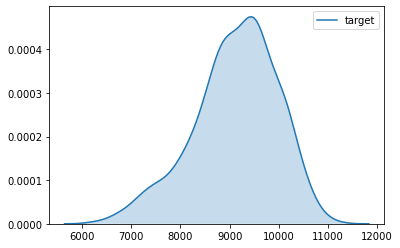

In [8]:
sns.kdeplot(df['target'],shade=True)
plt.show()

### Target variable is slightly left skewed.

# Checking the records which are outliers using IQR method.

In [11]:
q1=np.quantile(df['target'],q=0.25)
q2=np.quantile(df['target'],q=0.50)
q3=np.quantile(df['target'],q=0.75)

In [12]:
iqr=q3-q1
ll=q1-(1.5*iqr)
ul=q3+(1.5*iqr)

In [15]:
df[(df['target']>ul) | (df['target']<ll)].shape

(12, 10)

### There are 12 records in the dataset which are outliers, which are 1.33% of the dataset(900)
### So removing them

# Removing outliers

In [16]:
df1=df[df['target']<ul]
df1=df[df['target']>ll]

In [17]:
df1.shape

(888, 10)

# EDA Exploratory Data Analysis

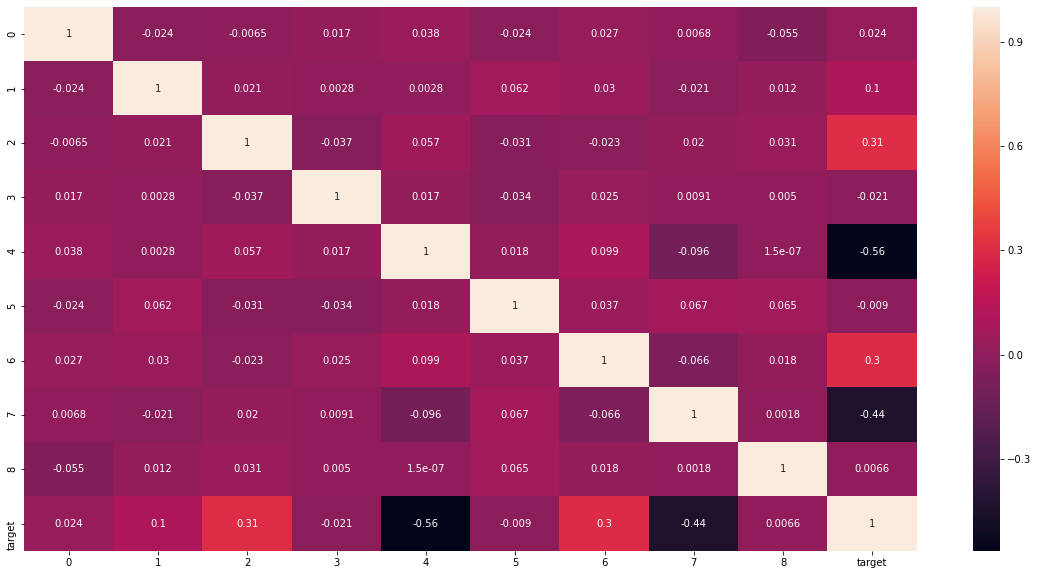

In [24]:
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(), annot=True)
plt.show()

### 4 and 7 features are highly negatively correlated with target

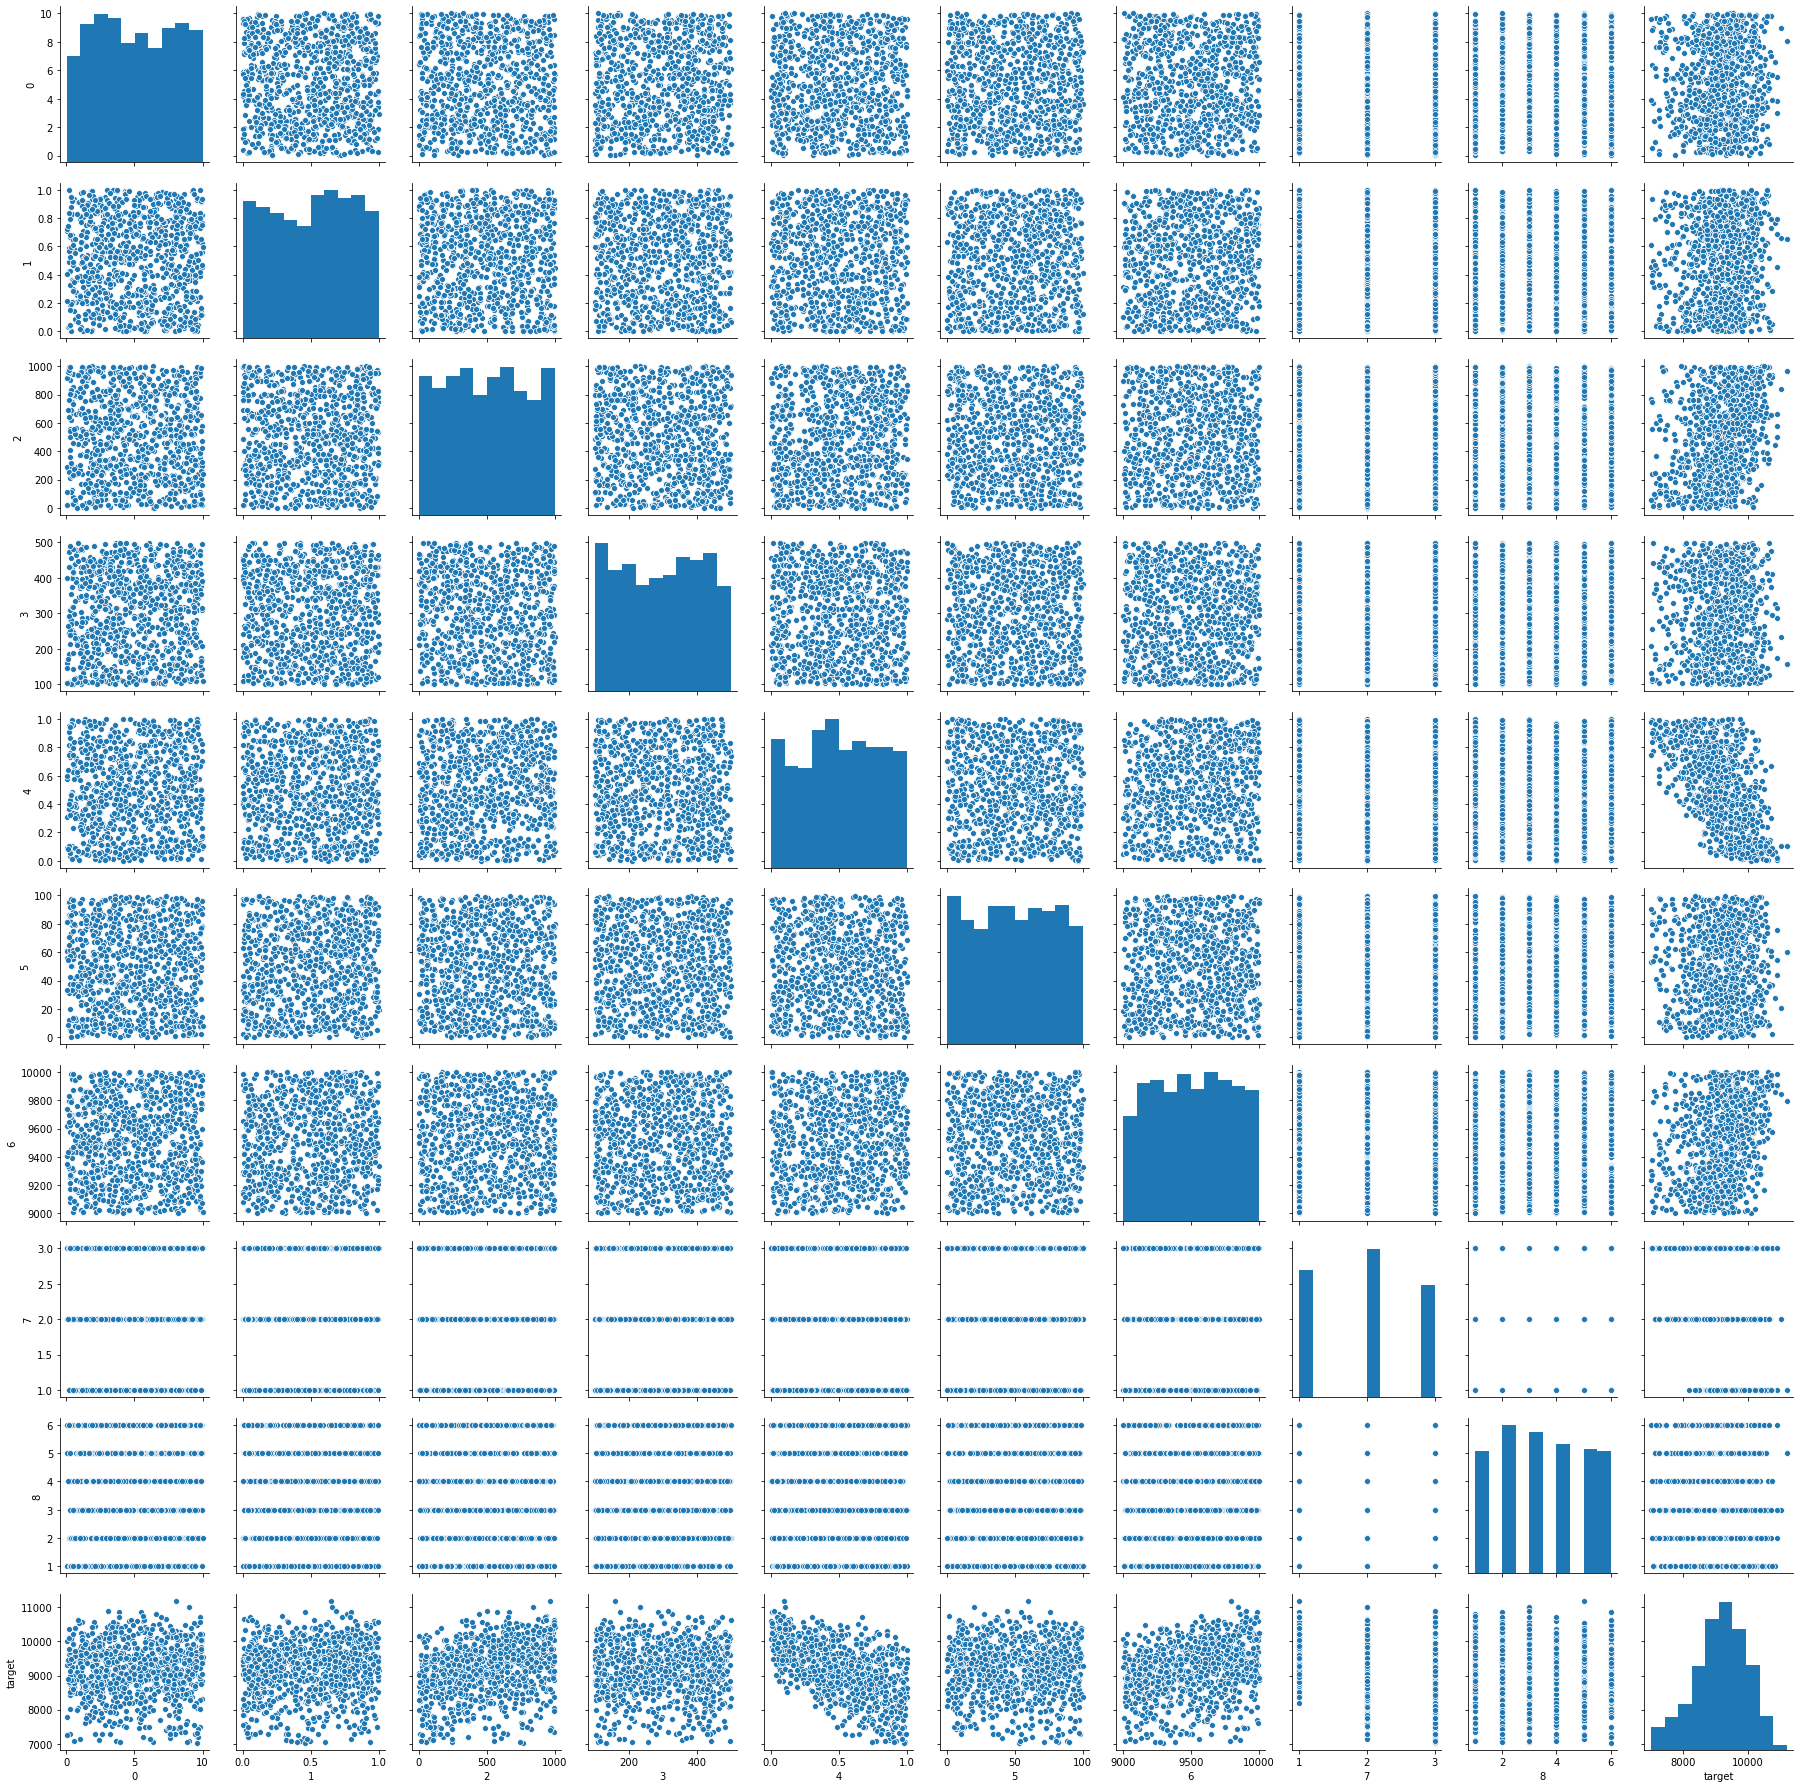

In [30]:
sns.pairplot(df1)
plt.show()

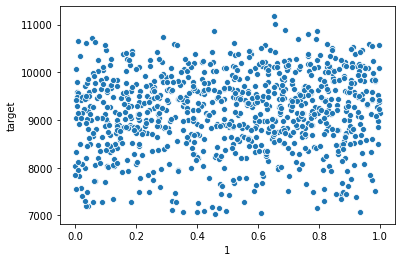

In [27]:
sns.scatterplot(x=df1['1'], y=df1['target'])
plt.show()

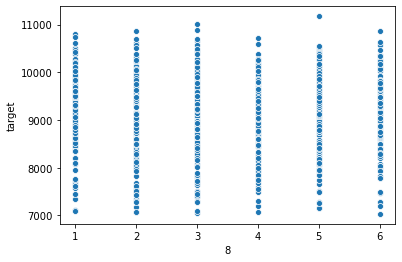

In [28]:
sns.scatterplot(x=df1['8'], y=df1['target'])
plt.show()

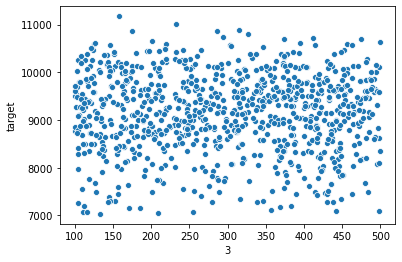

In [32]:
sns.scatterplot(x=df1['3'], y=df1['target'])
plt.show()

# Feature Selection

### Backward

In [33]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    x_1=X[cols]
    x_1=sm.add_constant(x_1)
    model = sm.OLS(y,x_1).fit()
    p = pd.Series(model.pvalues.values[1:],index =cols)
    pmax = max(p)
    feature_with_pmax = p.idxmax()
    if (pmax>0.05):
        cols.remove(feature_with_pmax)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['0', '1', '2', '4', '5', '6', '7']


### Feature 3 and 8 are not important features, they are not contributing much towards target. So we can remove the two features.

In [46]:
X = df1.drop(['3','8','target'],axis=1)
y = df1['target']

### After removing 3, 8 feature the Adj R-squared is also not changing i.e those two features are not contributing for predicting target.

# Assumption

## 1. Autocorrelation

In [47]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     560.8
Date:                Sun, 28 Jun 2020   Prob (F-statistic):          2.99e-319
Time:                        11:36:50   Log-Likelihood:                -6452.7
No. Observations:                 888   AIC:                         1.292e+04
Df Residuals:                     880   BIC:                         1.296e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1202.4871    398.528      3.017      0.003     420.311    1984.663
0             13.7349      4.093      3.356      0.001       5.702      21.768
1            216.1410     40.338      5.358      0.000     136.971     295.311
2              1.0109      0.040     25.061      0.000       0.932       1.090
4          -1904.4436     41.612    -45.766      0.000   -1986.114   -1822.773
5              0.8737      0.410      2.133      0.033       0.070       1.677
6              0.9651      0.042     23.161      0.000       0.883       1.047
7           -508.6664     15.028    -33.849      0.000    -538.161    -479.172
==============================================================================
Omnibus:                       11.350   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                7.395
Skew:                          -0.053   Prob(JB):                       0.0248
Kurtosis:                       2.566   Cond. No.                     3.25e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

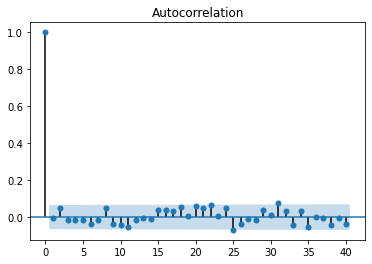

In [48]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(lin_reg.resid, lags=40 , alpha=0.05)
acf.show()

### According to the Durbin Watson value and above graph, there is no autocorrlation in the dataset

## 2) Multicollinearity test

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,0,1,2,4,5,6,7
vif,1.003451,1.006355,1.006352,1.024004,1.012494,1.01681,1.019216


### There is no multicollinearity.

# Spliting data

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)

In [51]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(621, 7)
(267, 7)
(267,)


# Model

## Linear Regression

#### Whole Data

In [50]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X, y)}')

Coefficients: [ 1.37348591e+01  2.16141043e+02  1.01094097e+00 -1.90444359e+03
  8.73676269e-01  9.65058062e-01 -5.08666450e+02]
Intercept: 1202.4870886096396
R^2 score: 0.8168808813532981


#### Splitted Data

In [176]:
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)
pred = lin_reg.predict(X_test)
print(f'R^2 score for train: {lin_reg.score(X_train, y_train)}')
print(f'R^2 score for test: {lin_reg.score(X_test, y_test)}')

R^2 score for train: 0.8226887247085132
R^2 score for test: 0.7936498079026365


### Score of test is less than score of trainning dataset, so the model is slightly overfitting

### To reduce overfitting we regularize it

### Regularization

In [177]:
# RIDGE
rr = Ridge(alpha=3) 
rr.fit(X_train, y_train)

Ridge(alpha=3, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [178]:
n_folds = 10            # n_folds = 10
param_grid = {'alpha': range(1,10)
             }
rr = Ridge()

grid_search = GridSearchCV(estimator=rr,param_grid=param_grid,cv=n_folds)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None, param_grid={'alpha': range(1, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [179]:
grid_search.best_params_ 

{'alpha': 1}

In [180]:
rr = Ridge(alpha=1) 
rr.fit(X_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [181]:
train_score=lin_reg.score(X_train, y_train)
test_score=lin_reg.score(X_test, y_test)

Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

In [182]:
print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)

linear regression train score: 0.8226887247085132
linear regression test score: 0.7936498079026365
ridge regression train score low alpha: 0.8225108827162225
ridge regression test score low alpha: 0.7948062491578332


#### Minute difference is seen in Linear Regression and Ridge

### RandomForest Regressor

In [54]:
from sklearn.ensemble import RandomForestRegressor
rfc_model = RandomForestRegressor()
rfc_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [56]:
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc

y_pred = rfc_model.predict(X_test)

In [57]:
print("Accuracy Score on Train data:",rfc_model.score(X_train,y_train))

Accuracy Score on Train data: 0.970024085868054


In [58]:
print("Accuracy Score on Test data:",rfc_model.score(X_test, y_test))

Accuracy Score on Test data: 0.7818339142431564


#### Hyper-Parameter Tunning:

In [102]:
from sklearn.model_selection import KFold, GridSearchCV

n_folds = 10            # n_folds = 10
param_grid = {'n_estimators': range(1,10),
              'max_depth': range(5,15,25),
              'oob_score': ["True","False"],
              'bootstrap': ["True","False"],
              "max_leaf_nodes" : range(5,15,25),
              'n_jobs': [1]                         #keep it 1 only
             }
rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,cv=n_folds)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'bootstrap': ['True', 'False']

In [103]:
grid_search.best_params_ 

{'bootstrap': 'True',
 'max_depth': 5,
 'max_leaf_nodes': 5,
 'n_estimators': 9,
 'n_jobs': 1,
 'oob_score': 'False'}

In [108]:
rfc_model = RandomForestRegressor(bootstrap=True,max_depth= 5,max_leaf_nodes= 5,n_estimators=9,n_jobs= 1,oob_score=False)
rfc_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=5,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [109]:
y_pred = rfc_model.predict(X_test)

In [110]:
print("Accuracy Score on Train data:",rfc_model.score(X_train,y_train))

Accuracy Score on Train data: 0.6465316827761319


In [111]:
print("Accuracy Score on Test data:",rfc_model.score(X_test, y_test))

Accuracy Score on Test data: 0.4781487953307821


### Decision Tree

In [71]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

#metrics
from statistics import mean
from sklearn.metrics import accuracy_score 
from sklearn.metrics import explained_variance_score as evs
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import os

In [91]:
DecisionTree = DecisionTreeRegressor(criterion='mse',random_state = 100,max_depth=20, min_samples_leaf=15)

DecisionTree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=15,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=100, splitter='best')

In [92]:
Pred = giniDecisionTree.predict(X_test)

In [93]:
print("Accuracy Score on Train data:",DecisionTree.score(X_train,y_train))

Accuracy Score on Train data: 0.8385713581296169


In [94]:
print("Accuracy Score on Test data:",DecisionTree.score(X_test,y_test))

Accuracy Score on Test data: 0.6719243093361746


#### Hyper-Parameter Tunning:

In [117]:
n_folds = 5            # n_folds = 10
param_grid = {'max_depth': range(5,15,20),
              "max_leaf_nodes" : range(5,15,25)
             }
DT = DecisionTreeRegressor()

gs = GridSearchCV(estimator=DT,param_grid=param_grid,cv=n_folds)
gs.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(5, 15, 20),
                         'max_leaf_nodes': range(5, 15, 25)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scori

In [118]:
gs.best_params_ 

{'max_depth': 5, 'max_leaf_nodes': 5}

In [119]:
DecisionTree = DecisionTreeRegressor(criterion='mse',random_state = 100,max_depth=5, min_samples_leaf=5)

DecisionTree.fit(X_train, y_train)
Pred = giniDecisionTree.predict(X_test)
print("Accuracy Score on Train data:",DecisionTree.score(X_train,y_train))
print("Accuracy Score on Test data:",DecisionTree.score(X_test,y_test))

Accuracy Score on Train data: 0.8334325915453611
Accuracy Score on Test data: 0.6353832551354197


### Conclusion:

#### Linear Regression Model is performing better than Random Forest and Decision Tree, as the accurracy of train and test data are closer to each other.
#### Also as the independent variables are numerical so Linear Regression will work best on this.

### Testing the dataset

In [189]:
test_df = pd.read_csv('prediction.csv')

In [190]:
test_df.head()

,0,1,2,3,4,5,6,7,8
0,8.243945,0.442707,814.191463,437.449497,0.820757,66.358208,9321.584760,1,5
1,0.450469,0.734878,690.536337,337.971868,0.163483,88.966042,9653.465215,2,3
2,5.805761,0.412531,225.544432,468.295427,0.254678,27.853712,9840.535247,2,3
3,4.126340,0.685302,73.330815,169.578438,0.828849,81.691968,9044.806270,2,5
4,8.082666,0.449977,526.274384,308.148895,0.737136,30.420377,9916.538668,1,5


In [191]:
test_df = test_df.drop(['3','8'],axis=1)

In [192]:
y_pred = pd.DataFrame(rr.predict(test_df))     ## Using Ridge 

In [193]:
y_pred.to_csv('test1.csv')